<a href="https://colab.research.google.com/github/springboardmentor2468a-lab/AgriYield/blob/TAMILARASAN/Agri_Yield_Predictor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**AgriYield Predictor: Forecasting Crop Yield Using Environmental and Soil Data**

Gemini_Generated_Image_wdq2mpwdq2mpwdq2.png

#**Milestone 1: Week 1 & 2 — Requirements & Dataset Preparation**

# **Project Overview & Scope**

**Project Objective**

Develop a machine learning model that can accurately predict crop yield (kg/hectare) for different crops grown in various regions, based on soil and environmental data.

**Project Scope**

This project will include:


| Task                       | Includes                                     | Tools Used          |
| -------------------------- | -------------------------------------------- | ------------------- |
| Data Collection & Cleaning | Integrating soil, crop, and climate datasets | Python (Pandas)     |
| EDA & Feature Engineering  | Trends, correlations, engineered features    | Matplotlib, Seaborn |
| Model Training             | Regression models                            | Sklearn, XGBoost    |
| Performance Evaluation     | RMSE, MAE, R² score                          | Sklearn metrics     |
| Deployment                 | Simple UI for farmers                        | Streamlit / Flask   |


####**Architectural diagram**

Screenshot 2025-11-28 025625.png

#**Import Required Libraries**


In [178]:
import numpy as np            # For numerical operations
import pandas as pd           # For data loading & preprocessing
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns            # For statistical visualizations

from sklearn.model_selection import train_test_split

#**Load Raw Datasets**

In [179]:
# Load the first dataset (FAOSTAT data)
fao = pd.read_csv("DF_1_FAOSTAT_data_en_11-19-2025.csv")

In [180]:
# Load the second dataset (Crop Recommendation data)
crop = pd.read_csv("DF_2_Crop_recommendation.csv")

In [181]:
print("FAOSTAT shape:", faostat_df.shape)
print("Crop Recommendation shape:", crop_rec_df.shape)

FAOSTAT shape: (5940, 15)
Crop Recommendation shape: (2200, 8)


In [182]:
fao


Domain Code                        Domain  Area Code (M49)   Area  \
0            QCL  Crops and livestock products              356  India   
1            QCL  Crops and livestock products              356  India   
2            QCL  Crops and livestock products              356  India   
3            QCL  Crops and livestock products              356  India   
4            QCL  Crops and livestock products              356  India   
...          ...                           ...              ...    ...   
5935         QCL  Crops and livestock products              356  India   
5936         QCL  Crops and livestock products              356  India   
5937         QCL  Crops and livestock products              356  India   
5938         QCL  Crops and livestock products              356  India   
5939         QCL  Crops and livestock products              356  India   

      Element Code         Element  Item Code (CPC)  \
0             5312  Area harvested           1654.0   
1             5412           Yield           1654.0   
2             5510      Production           1654.0   
3             5312  Area harvested           1654.0   
4             5412           Yield           1654.0   
...            ...             ...              ...   
5935          5412           Yield            111.0   
5936          5510      Production            111.0   
5937          5312  Area harvested            111.0   
5938          5412           Yield            111.0   
5939          5510      Production            111.0   

                                                   Item  Year Code  Year  \
0     Anise, badian, coriander, cumin, caraway, fenn...       2000  2000   
1     Anise, badian, coriander, cumin, caraway, fenn...       2000  2000   
2     Anise, badian, coriander, cumin, caraway, fenn...       2000  2000   
3     Anise, badian, coriander, cumin, caraway, fenn...       2001  2001   
4     Anise, badian, coriander, cumin, caraway, fenn...       2001  2001   
...                                                 ...        ...   ...   
5935                                              Wheat       2022  2022   
5936                                              Wheat       2022  2022   
5937                                              Wheat       2023  2023   
5938                                              Wheat       2023  2023   
5939                                              Wheat       2023  2023   

       Unit         Value Flag Flag Description Note  
0        ha  3.444340e+05    A  Official figure  NaN  
1     kg/ha  4.840000e+02    A  Official figure  NaN  
2         t  1.666920e+05    A  Official figure  NaN  
3        ha  5.692710e+05    A  Official figure  NaN  
4     kg/ha  4.303000e+02    A  Official figure  NaN  
...     ...           ...  ...              ...  ...  
5935  kg/ha  3.537300e+03    A  Official figure  NaN  
5936      t  1.077421e+08    A  Official figure  NaN  
5937     ha  3.140072e+07    A  Official figure  NaN  
5938  kg/ha  3.520700e+03    A  Official figure  NaN  
5939      t  1.105537e+08    A  Official figure  NaN  

[5940 rows x 15 columns]

In [183]:
crop



N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]

In [184]:
fao['Item'].unique()[:40]

array(['Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw',
       'Apples', 'Apricots', 'Areca nuts', 'Bananas', 'Barley',
       'Beans, dry', 'Cabbages', 'Cantaloupes and other melons',
       'Carrots and turnips', 'Cashew nuts, in shell', 'Cassava, fresh',
       'Castor oil seeds', 'Cauliflowers and broccoli', 'Cherries',
       'Chick peas, dry',
       'Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw',
       'Chillies and peppers, green (Capsicum spp. and Pimenta spp.)',
       'Cocoa beans', 'Coconuts, in shell', 'Coffee, green', 'Coir, raw',
       'Cucumbers and gherkins', 'Eggplants (aubergines)', 'Figs',
       'Ginger, raw', 'Grapes', 'Green garlic',
       'Groundnuts, excluding shelled', 'Jute, raw or retted',
       'Kenaf, and other textile bast fibres, raw or retted',
       'Lemons and limes', 'Lentils, dry', 'Lettuce and chicory',
       'Linseed', 'Maize (corn)', 'Mangoes, guavas and mangosteens',
       'Millet', 'Mushrooms a

In [185]:
for i in fao['Item'].unique():
    print(i)

Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw
Apples
Apricots
Areca nuts
Bananas
Barley
Beans, dry
Cabbages
Cantaloupes and other melons
Carrots and turnips
Cashew nuts, in shell
Cassava, fresh
Castor oil seeds
Cauliflowers and broccoli
Cherries
Chick peas, dry
Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw
Chillies and peppers, green (Capsicum spp. and Pimenta spp.)
Cocoa beans
Coconuts, in shell
Coffee, green
Coir, raw
Cucumbers and gherkins
Eggplants (aubergines)
Figs
Ginger, raw
Grapes
Green garlic
Groundnuts, excluding shelled
Jute, raw or retted
Kenaf, and other textile bast fibres, raw or retted
Lemons and limes
Lentils, dry
Lettuce and chicory
Linseed
Maize (corn)
Mangoes, guavas and mangosteens
Millet
Mushrooms and truffles
Natural rubber in primary forms
Nutmeg, mace, cardamoms, raw
Okra
Onions and shallots, dry (excluding dehydrated)
Oranges
Other beans, green
Other berries and fruits of the genus vaccinium n.e.c.
Other citrus fruit,

In [186]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

#**Initial Data Inspection**

In [187]:
def inspect_dataset(df, name):
    print(f"\n Dataset Inspection: {name}")
    print("-" * 60)

    # 1️ First few records
    print("\n First 5 rows:")
    display(df.head())

    # 2️ Dataset shape
    print("\n Shape (Rows, Columns):")
    print(df.shape)

    # 3️ Basic information
    print("\n Basic Info:")
    df.info()

    # 4️ Missing values
    print("\n Missing Values:")
    print(df.isnull().sum().sort_values(ascending=False).to_markdown(numalign="left", stralign="left"))

    # 5️ Duplicate rows
    print("\n Duplicate Rows:")
    print(f"Number of duplicate rows: {df.duplicated().sum()}")

    # 6 Duplicate columns
    print("\n Duplicate columns:")
    print(f"Number of duplicate columns: {df.duplicated().sum()}")

    # 7 Descriptive statistics for numerical columns
    print("\n  Descriptive Statistics:")
    print(df.describe().to_markdown(numalign="left", stralign="left"))

    # 8 Unique values for categorical columns (top 10)
    print("\n Unique Values (Top 10 for Object/Category Dtype Columns):")
    for col in df.select_dtypes(include=['object', 'category']).columns:
        print(f"  - {col}:")
        print(df[col].value_counts().head(10).to_markdown(numalign="left", stralign="left"))
        print("\n")

# Now, let's call the function for each dataframe
inspect_dataset(faostat_df, "FAOSTAT Dataset")
inspect_dataset(crop_rec_df, "Crop Recommendation Dataset")


 Dataset Inspection: FAOSTAT Dataset
------------------------------------------------------------

 First 5 rows:


Domain Code                        Domain  Area Code (M49)   Area  \
0         QCL  Crops and livestock products              356  India   
1         QCL  Crops and livestock products              356  India   
2         QCL  Crops and livestock products              356  India   
3         QCL  Crops and livestock products              356  India   
4         QCL  Crops and livestock products              356  India   

   Element Code         Element  Item Code (CPC)  \
0          5312  Area harvested           1654.0   
1          5412           Yield           1654.0   
2          5510      Production           1654.0   
3          5312  Area harvested           1654.0   
4          5412           Yield           1654.0   

                                                crop  Year Code  Year   Unit  \
0  anise, badian, coriander, cumin, caraway, fenn...       2000  2000     ha   
1  anise, badian, coriander, cumin, caraway, fenn...       2000  2000  kg/ha   
2  anise, badian, coriander, cumin, caraway, fenn...       2000  2000      t   
3  anise, badian, coriander, cumin, caraway, fenn...       2001  2001     ha   
4  anise, badian, coriander, cumin, caraway, fenn...       2001  2001  kg/ha   

      Value Flag Flag Description     Note  
0  344434.0    A  Official figure  Unknown  
1     484.0    A  Official figure  Unknown  
2  166692.0    A  Official figure  Unknown  
3  569271.0    A  Official figure  Unknown  
4     430.3    A  Official figure  Unknown


 Shape (Rows, Columns):
(5940, 15)

 Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5940 entries, 0 to 5939
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       5940 non-null   object 
 1   Domain            5940 non-null   object 
 2   Area Code (M49)   5940 non-null   int64  
 3   Area              5940 non-null   object 
 4   Element Code      5940 non-null   int64  
 5   Element           5940 non-null   object 
 6   Item Code (CPC)   5940 non-null   float64
 7   crop              5940 non-null   object 
 8   Year Code         5940 non-null   int64  
 9   Year              5940 non-null   int64  
 10  Unit              5940 non-null   object 
 11  Value             5940 non-null   float64
 12  Flag              5940 non-null   object 
 13  Flag Description  5940 non-null   object 
 14  Note              5940 non-null   object 
dtypes: float64(2), int64(4), object(9)
memo

N   P   K  temperature   humidity        ph    rainfall  crop
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


 Shape (Rows, Columns):
(2200, 8)

 Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB

 Missing Values:
|             | 0   |
|:------------|:----|
| N           | 0   |
| P           | 0   |
| K           | 0   |
| temperature | 0   |
| humidity    | 0   |
| ph          | 0   |
| rainfall    | 0   |
| crop        | 0   |

 Duplicate Rows:
Number of duplicate rows: 0

 Duplicate columns:
Number of duplicate columns: 0

  Descriptive Statistics

# **CROP MAPPING**

In [188]:
crop_mapping = {
    "Rice": "rice",
    "Maize (corn)": "maize",
    "Chick peas":"chickpea",
    "Pigeon peas":"pigeonpeas" ,
    "Beans":"mothbeans" ,
    "Lentils":"lentil" ,
    "Bananas":"banana" ,
    "Mangoes": "mango" ,
    "Grapes":"grapes" ,
    "Watermelons":"watermelon" ,
    "Cantaloupes ":"muskmelon",
    "Apples":"apple" ,
    "Oranges":"orange" ,
    "Papayas":"papaya" ,
    "Coconuts":"coconut" ,
    "Seed cotton":"cotton"  ,
    "Jute":"jute" ,
    "Coffee":"coffee"

}


In [189]:
len(crop_mapping)

18

In [190]:
fao['Crop']=fao['Item'].map(crop_mapping)

In [191]:
crop=crop.rename(columns={'label':'Crop'})

In [192]:
crop

N   P   K  temperature   humidity        ph    rainfall    Crop
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]

#**Data Cleaning & Formatting**

**Remove duplicate rows**

In [193]:
# Remove duplicate rows
faostat_df.drop_duplicates(inplace=True)
crop_rec_df.drop_duplicates(inplace=True)

**Check missing values**

In [194]:
# Check missing values
print("Missing values in FAOSTAT dataset:")
print(faostat_df.isnull().sum())

print("Missing values in Crop Recommendation dataset:")
print(crop_rec_df.isnull().sum())

Missing values in FAOSTAT dataset:
Domain Code         0
Domain              0
Area Code (M49)     0
Area                0
Element Code        0
Element             0
Item Code (CPC)     0
crop                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
Note                0
dtype: int64
Missing values in Crop Recommendation dataset:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
crop           0
dtype: int64


In [198]:
# Show updated shapes
print("FAOSTAT shape:", faostat_df.shape)
print("Crop Recommendation shape:", crop_rec_df.shape)


FAOSTAT shape: (5940, 15)
Crop Recommendation shape: (2200, 8)


# **Explosion**

Before

In [199]:
# Create a safe copy of original data
df_explosion = fao.copy()

# Show row count before explosion
print("Rows BEFORE explosion:", df_explosion.shape[0])

# Show sample crop names before explosion
df_explosion[['Item']].head(10)


Rows BEFORE explosion: 5940


Item
0  Anise, badian, coriander, cumin, caraway, fenn...
1  Anise, badian, coriander, cumin, caraway, fenn...
2  Anise, badian, coriander, cumin, caraway, fenn...
3  Anise, badian, coriander, cumin, caraway, fenn...
4  Anise, badian, coriander, cumin, caraway, fenn...
5  Anise, badian, coriander, cumin, caraway, fenn...
6  Anise, badian, coriander, cumin, caraway, fenn...
7  Anise, badian, coriander, cumin, caraway, fenn...
8  Anise, badian, coriander, cumin, caraway, fenn...
9  Anise, badian, coriander, cumin, caraway, fenn...

Cleaning

In [201]:
# Create a copy so the original dataset remains unchanged
df_explosion = fao.copy()


In [203]:
# Standardize separators and text
df_explosion['Item_List'] = (
    df_explosion['Item']
    .str.lower()
    .str.replace(' and ', ',', regex=False)
    .str.replace('(', '', regex=False)
    .str.replace(')', '', regex=False)
)


In [204]:
# Split the standardized string into a list
df_explosion['Item_List'] = df_explosion['Item_List'].str.split(',')


In [205]:
# Explode the list so each crop gets its own row
df_exploded = df_explosion.explode('Item_List')


After

In [206]:
print("Rows AFTER explosion:", df_exploded.shape[0])

# Show sample rows AFTER explosion
df_exploded[['Item', 'Item_List']].head(10)


Rows AFTER explosion: 10519


Item        Item_List
0  Anise, badian, coriander, cumin, caraway, fenn...            anise
0  Anise, badian, coriander, cumin, caraway, fenn...           badian
0  Anise, badian, coriander, cumin, caraway, fenn...        coriander
0  Anise, badian, coriander, cumin, caraway, fenn...            cumin
0  Anise, badian, coriander, cumin, caraway, fenn...          caraway
0  Anise, badian, coriander, cumin, caraway, fenn...           fennel
0  Anise, badian, coriander, cumin, caraway, fenn...  juniper berries
0  Anise, badian, coriander, cumin, caraway, fenn...              raw
1  Anise, badian, coriander, cumin, caraway, fenn...            anise
1  Anise, badian, coriander, cumin, caraway, fenn...           badian

#**Merge Datasets**

In [ ]:
df_merged = crop.merge(
    fao,
    left_on="Crop",
    right_on="Crop",
    how="inner"
)

In [ ]:
df_merged


N   P   K  temperature   humidity        ph    rainfall    Crop  \
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
1      90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
2      90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
3      90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
4      90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
...    ..  ..  ..          ...        ...       ...         ...     ...   
57595  39  64  53    23.012402  91.073555  6.598860  208.335798  papaya   
57596  39  64  53    23.012402  91.073555  6.598860  208.335798  papaya   
57597  39  64  53    23.012402  91.073555  6.598860  208.335798  papaya   
57598  39  64  53    23.012402  91.073555  6.598860  208.335798  papaya   
57599  39  64  53    23.012402  91.073555  6.598860  208.335798  papaya   

      Domain Code                        Domain  ...         Element  \
0             QCL  Crops and livestock products  ...  Area harvested   
1             QCL  Crops and livestock products  ...           Yield   
2             QCL  Crops and livestock products  ...      Production   
3             QCL  Crops and livestock products  ...  Area harvested   
4             QCL  Crops and livestock products  ...           Yield   
...           ...                           ...  ...             ...   
57595         QCL  Crops and livestock products  ...           Yield   
57596         QCL  Crops and livestock products  ...      Production   
57597         QCL  Crops and livestock products  ...  Area harvested   
57598         QCL  Crops and livestock products  ...           Yield   
57599         QCL  Crops and livestock products  ...      Production   

      Item Code (CPC)     Item Year Code  Year   Unit        Value  Flag  \
0               113.0     Rice      2000  2000     ha   44712000.0     A   
1               113.0     Rice      2000  2000  kg/ha       2850.8     A   
2               113.0     Rice      2000  2000      t  127464896.0     A   
3               113.0     Rice      2001  2001     ha   44900000.0     A   
4               113.0     Rice      2001  2001  kg/ha       3115.8     A   
...               ...      ...       ...   ...    ...          ...   ...   
57595          1317.0  Papayas      2022  2022  kg/ha      35606.7     A   
57596          1317.0  Papayas      2022  2022      t    5341000.0     A   
57597          1317.0  Papayas      2023  2023     ha     148000.0     A   
57598          1317.0  Papayas      2023  2023  kg/ha      35405.4     A   
57599          1317.0  Papayas      2023  2023      t    5240000.0     A   

      Flag Description  Note  
0      Official figure   NaN  
1      Official figure   NaN  
2      Official figure   NaN  
3      Official figure   NaN  
4      Official figure   NaN  
...                ...   ...  
57595  Official figure   NaN  
57596  Official figure   NaN  
57597  Official figure   NaN  
57598  Official figure   NaN  
57599  Official figure   NaN  

[57600 rows x 23 columns]

In [ ]:
df_merged = df_merged[df_merged['Element'] == 'Production']

In [ ]:
df_merged

N   P   K  temperature   humidity        ph    rainfall    Crop  \
2      90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
5      90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
8      90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
11     90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
14     90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
...    ..  ..  ..          ...        ...       ...         ...     ...   
57587  39  64  53    23.012402  91.073555  6.598860  208.335798  papaya   
57590  39  64  53    23.012402  91.073555  6.598860  208.335798  papaya   
57593  39  64  53    23.012402  91.073555  6.598860  208.335798  papaya   
57596  39  64  53    23.012402  91.073555  6.598860  208.335798  papaya   
57599  39  64  53    23.012402  91.073555  6.598860  208.335798  papaya   

      Domain Code                        Domain  ...     Element  \
2             QCL  Crops and livestock products  ...  Production   
5             QCL  Crops and livestock products  ...  Production   
8             QCL  Crops and livestock products  ...  Production   
11            QCL  Crops and livestock products  ...  Production   
14            QCL  Crops and livestock products  ...  Production   
...           ...                           ...  ...         ...   
57587         QCL  Crops and livestock products  ...  Production   
57590         QCL  Crops and livestock products  ...  Production   
57593         QCL  Crops and livestock products  ...  Production   
57596         QCL  Crops and livestock products  ...  Production   
57599         QCL  Crops and livestock products  ...  Production   

      Item Code (CPC)     Item Year Code  Year Unit        Value  Flag  \
2               113.0     Rice      2000  2000    t  127464896.0     A   
5               113.0     Rice      2001  2001    t  139900000.0     A   
8               113.0     Rice      2002  2002    t  107730304.0     A   
11              113.0     Rice      2003  2003    t  132789000.0     A   
14              113.0     Rice      2004  2004    t  124697104.0     A   
...               ...      ...       ...   ...  ...          ...   ...   
57587          1317.0  Papayas      2019  2019    t    6050000.0     A   
57590          1317.0  Papayas      2020  2020    t    5780000.0     A   
57593          1317.0  Papayas      2021  2021    t    5540000.0     A   
57596          1317.0  Papayas      2022  2022    t    5341000.0     A   
57599          1317.0  Papayas      2023  2023    t    5240000.0     A   

      Flag Description  Note  
2      Official figure   NaN  
5      Official figure   NaN  
8      Official figure   NaN  
11     Official figure   NaN  
14     Official figure   NaN  
...                ...   ...  
57587  Official figure   NaN  
57590  Official figure   NaN  
57593  Official figure   NaN  
57596  Official figure   NaN  
57599  Official figure   NaN  

[19200 rows x 23 columns]

In [ ]:
df_merged['Crop'].value_counts()

Crop
rice          2400
maize         2400
banana        2400
grapes        2400
watermelon    2400
apple         2400
orange        2400
papaya        2400
Name: count, dtype: int64

In [ ]:
len(crop_mapping)

18

In [ ]:
df_merged=df_merged.drop(columns=['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item','Year', 'Year Code','Unit', 'Flag', 'Flag Description', 'Note'])

In [ ]:
df_merged

N   P   K  temperature   humidity        ph    rainfall    Crop  \
2      90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
5      90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
8      90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
11     90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
14     90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
...    ..  ..  ..          ...        ...       ...         ...     ...   
57587  39  64  53    23.012402  91.073555  6.598860  208.335798  papaya   
57590  39  64  53    23.012402  91.073555  6.598860  208.335798  papaya   
57593  39  64  53    23.012402  91.073555  6.598860  208.335798  papaya   
57596  39  64  53    23.012402  91.073555  6.598860  208.335798  papaya   
57599  39  64  53    23.012402  91.073555  6.598860  208.335798  papaya   

             Value  
2      127464896.0  
5      139900000.0  
8      107730304.0  
11     132789000.0  
14     124697104.0  
...            ...  
57587    6050000.0  
57590    5780000.0  
57593    5540000.0  
57596    5341000.0  
57599    5240000.0  

[19200 rows x 9 columns]

In [ ]:
df_merged.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
Crop           0
Value          0
dtype: int64

In [ ]:
df_merged.duplicated().sum()

np.int64(400)

In [ ]:
df_merged=df_merged.drop_duplicates().reset_index(drop=True)

In [ ]:
df_merged

N   P   K  temperature   humidity        ph    rainfall    Crop  \
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
1      90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
2      90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
3      90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
4      90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
...    ..  ..  ..          ...        ...       ...         ...     ...   
18795  39  64  53    23.012402  91.073555  6.598860  208.335798  papaya   
18796  39  64  53    23.012402  91.073555  6.598860  208.335798  papaya   
18797  39  64  53    23.012402  91.073555  6.598860  208.335798  papaya   
18798  39  64  53    23.012402  91.073555  6.598860  208.335798  papaya   
18799  39  64  53    23.012402  91.073555  6.598860  208.335798  papaya   

             Value  
0      127464896.0  
1      139900000.0  
2      107730304.0  
3      132789000.0  
4      124697104.0  
...            ...  
18795    6050000.0  
18796    5780000.0  
18797    5540000.0  
18798    5341000.0  
18799    5240000.0  

[18800 rows x 9 columns]

In [ ]:
df_merged.describe()

N             P             K   temperature      humidity  \
count  18800.000000  18800.000000  18800.000000  18800.000000  18800.000000   
mean      59.368404     68.079947     78.881383     25.307056     83.927531   
std       34.661414     43.742443     72.278261      6.133339      8.875227   
min        0.000000      5.000000      5.000000      8.825675     55.282204   
25%       29.000000     35.000000     36.000000     22.355105     80.662810   
50%       63.000000     57.000000     49.000000     24.972561     83.714990   
75%       90.000000    120.000000    195.000000     27.394896     91.372581   
max      120.000000    145.000000    205.000000     43.675493     94.964199   

                 ph      rainfall         Value  
count  18800.000000  18800.000000  1.880000e+04  
mean       6.348127    114.177369  2.754976e+07  
std        0.549135     60.151072  5.095668e+07  
min        5.005307     40.126504  2.550000e+05  
25%        5.915055     69.867126  2.146650e+06  
50%        6.313086    103.923226  3.813000e+06  
75%        6.708447    118.604465  2.466960e+07  
max        7.995849    298.560117  2.067270e+08

In [ ]:
df_merged.nunique()

N              118
P              113
K               53
temperature    800
humidity       800
ph             800
rainfall       800
Crop             8
Value          188
dtype: int64

# **Missing Value Analysis & Imputation**

In [ ]:
# Fill missing values in FAOSTAT dataset
faostat_df.fillna({
    col: faostat_df[col].mean() if faostat_df[col].dtype != 'object' else "Unknown"
    for col in faostat_df.columns
}, inplace=True)



In [ ]:
# Fill missing values in Crop Recommendation dataset
crop_rec_df.fillna({
    col: crop_rec_df[col].mean() if crop_rec_df[col].dtype != 'object' else "Unknown"
    for col in crop_rec_df.columns
}, inplace=True)

print(" Missing values handled successfully!")

 Missing values handled successfully!


In [ ]:
#Check again after fixing
print("Remaining missing values in FAOSTAT:")
print(faostat_df.isnull().sum())

print("\nRemaining missing values in Crop Recommendation:")
print(crop_rec_df.isnull().sum())


Remaining missing values in FAOSTAT:
Domain Code         0
Domain              0
Area Code (M49)     0
Area                0
Element Code        0
Element             0
Item Code (CPC)     0
crop                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
Note                0
dtype: int64

Remaining missing values in Crop Recommendation:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
crop           0
dtype: int64


# **Save Cleaned Dataset for EDA**

#####**Save Cleaned Dataset**

In [ ]:
fao
crop


N   P   K  temperature   humidity        ph    rainfall    Crop
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]

In [ ]:
# Save cleaned FAOSTAT dataset
faostat_df.to_csv("cleaned_faostat_data.csv", index=False)

# Save cleaned Crop Recommendation dataset
crop_rec_df.to_csv("cleaned_crop_rec_data.csv", index=False)

print(" Cleaned datasets saved successfully!")


 Cleaned datasets saved successfully!


In [ ]:
# show saved files
import os
print(os.listdir())


['.config', 'DF_1_FAOSTAT_data_en_11-19-2025.csv', 'cleaned_crop_rec_data.csv', 'DF_2_Crop_recommendation.csv', 'Final_Agri_Data.csv', 'cleaned_faostat_data.csv', '.ipynb_checkpoints', 'sample_data']


#####**EDA (Exploratory Data Analysis)**

**Step 1: Dataset Overview**

In [218]:
# Dataset overview for FAOSTAT
print(" FAOSTAT Dataset Info:")
print(fao.info())

print(" FAOSTAT Describe:")
display(fao.describe())

# Dataset overview for Crop Recommendation
print(" Crop Recommendation Dataset Info:")
print(crop.info())

print(" Crop Recommendation Describe:")
display(crop.describe())



 FAOSTAT Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5940 entries, 0 to 5939
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       5940 non-null   object 
 1   Domain            5940 non-null   object 
 2   Area Code (M49)   5940 non-null   int64  
 3   Area              5940 non-null   object 
 4   Element Code      5940 non-null   int64  
 5   Element           5940 non-null   object 
 6   Item Code (CPC)   5940 non-null   float64
 7   crop              5940 non-null   object 
 8   Year Code         5940 non-null   int64  
 9   Year              5940 non-null   int64  
 10  Unit              5940 non-null   object 
 11  Value             5940 non-null   float64
 12  Flag              5940 non-null   object 
 13  Flag Description  5940 non-null   object 
 14  Note              5940 non-null   object 
dtypes: float64(2), int64(4), object(9)
memory usage: 696.2+ KB
None
 F

Area Code (M49)  Element Code  Item Code (CPC)    Year Code  \
count           5940.0   5940.000000      5940.000000  5940.000000   
mean             356.0   5411.868687      1328.049098  2011.442424   
std                0.0     81.720489       445.253861     6.905385   
min              356.0   5312.000000       111.000000  2000.000000   
25%              356.0   5312.000000      1242.000000  2005.000000   
50%              356.0   5412.000000      1345.000000  2011.000000   
75%              356.0   5510.000000      1620.000000  2017.000000   
max              356.0   5510.000000      1970.000000  2023.000000   

              Year         Value  
count  5940.000000  5.940000e+03  
mean   2011.442424  4.757827e+06  
std       6.905385  2.506259e+07  
min    2000.000000  1.569000e+02  
25%    2005.000000  8.608000e+03  
50%    2011.000000  2.242500e+05  
75%    2017.000000  1.859887e+06  
max    2023.000000  4.905334e+08

 Crop Recommendation Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None
 Crop Recommendation Describe:


N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

**Step 2: Check Crop Distribution (Value Counts)**

In [ ]:
# Crop count in each dataset
print(" Top Crops in FAOSTAT:")
print(faostat_df['crop'].value_counts().head())

print(" Crop Labels in Recommendation Dataset:")
print(crop_rec_df['crop'].value_counts().head())

 Top Crops in FAOSTAT:
crop
anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw    72
apples                                                                       72
apricots                                                                     72
areca nuts                                                                   72
bananas                                                                      72
Name: count, dtype: int64
 Crop Labels in Recommendation Dataset:
crop
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
Name: count, dtype: int64


**Step 3: Crop Production Analysis (Bar Chart)**

In [212]:
import matplotlib.pyplot as plt

# Count crops and show top 10
top_crops = faostat_df['crop'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_crops.plot(kind='bar')
plt.title("Top 10 Crops in FAOSTAT")
plt.xlabel("Crop Name")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**Step 4: Production Over Years (Line Chart)**

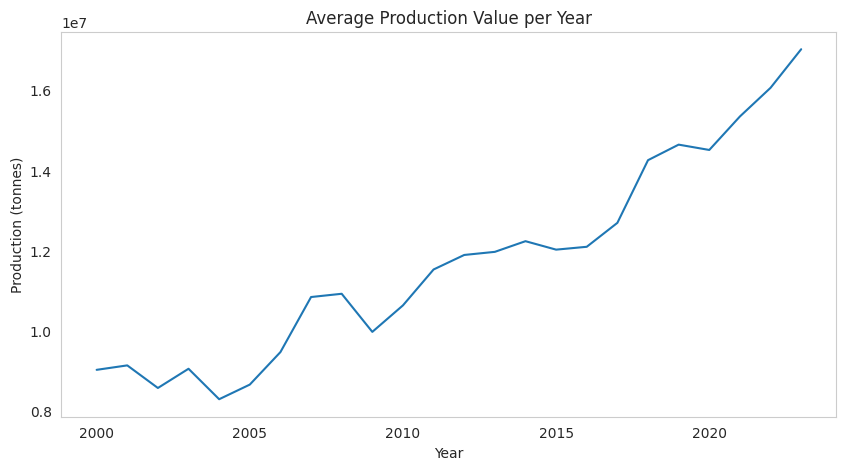

In [215]:
# Filter only Production rows
production_df = fao[fao['Element'] == 'Production']

# Group by Year and calculate average production
yearly_production = production_df.groupby('Year')['Value'].mean()

plt.figure(figsize=(10,5))
yearly_production.plot(kind='line')
plt.title("Average Production Value per Year")
plt.xlabel("Year")
plt.ylabel("Production (tonnes)")
plt.grid()
plt.show()


**Step 5: Correlation Heatmap (Crop Recommendation Dataset)**

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,6))
# Exclude non-numeric columns (like 'crop') when calculating correlation
sns.heatmap(crop_rec_df.drop(columns=['crop']).corr(), annot=True, cmap="viridis")
plt.title("Correlation Heatmap - Soil & Weather Features")
plt.show()

**Step 6: Boxplot to Detect Outliers**

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=crop_rec_df.select_dtypes(include=['float64','int64']))
plt.title("Outlier Detection in Numeric Features")
plt.xticks(rotation=45)
plt.show()


# **Milestone 2: Week 3 & 4 - EDA & Feature Engineering**

### **Performing Exploratory Data Analysis (EDA)**

--- Performing Exploratory Data Analysis (EDA) on df_final_agri_encoded ---


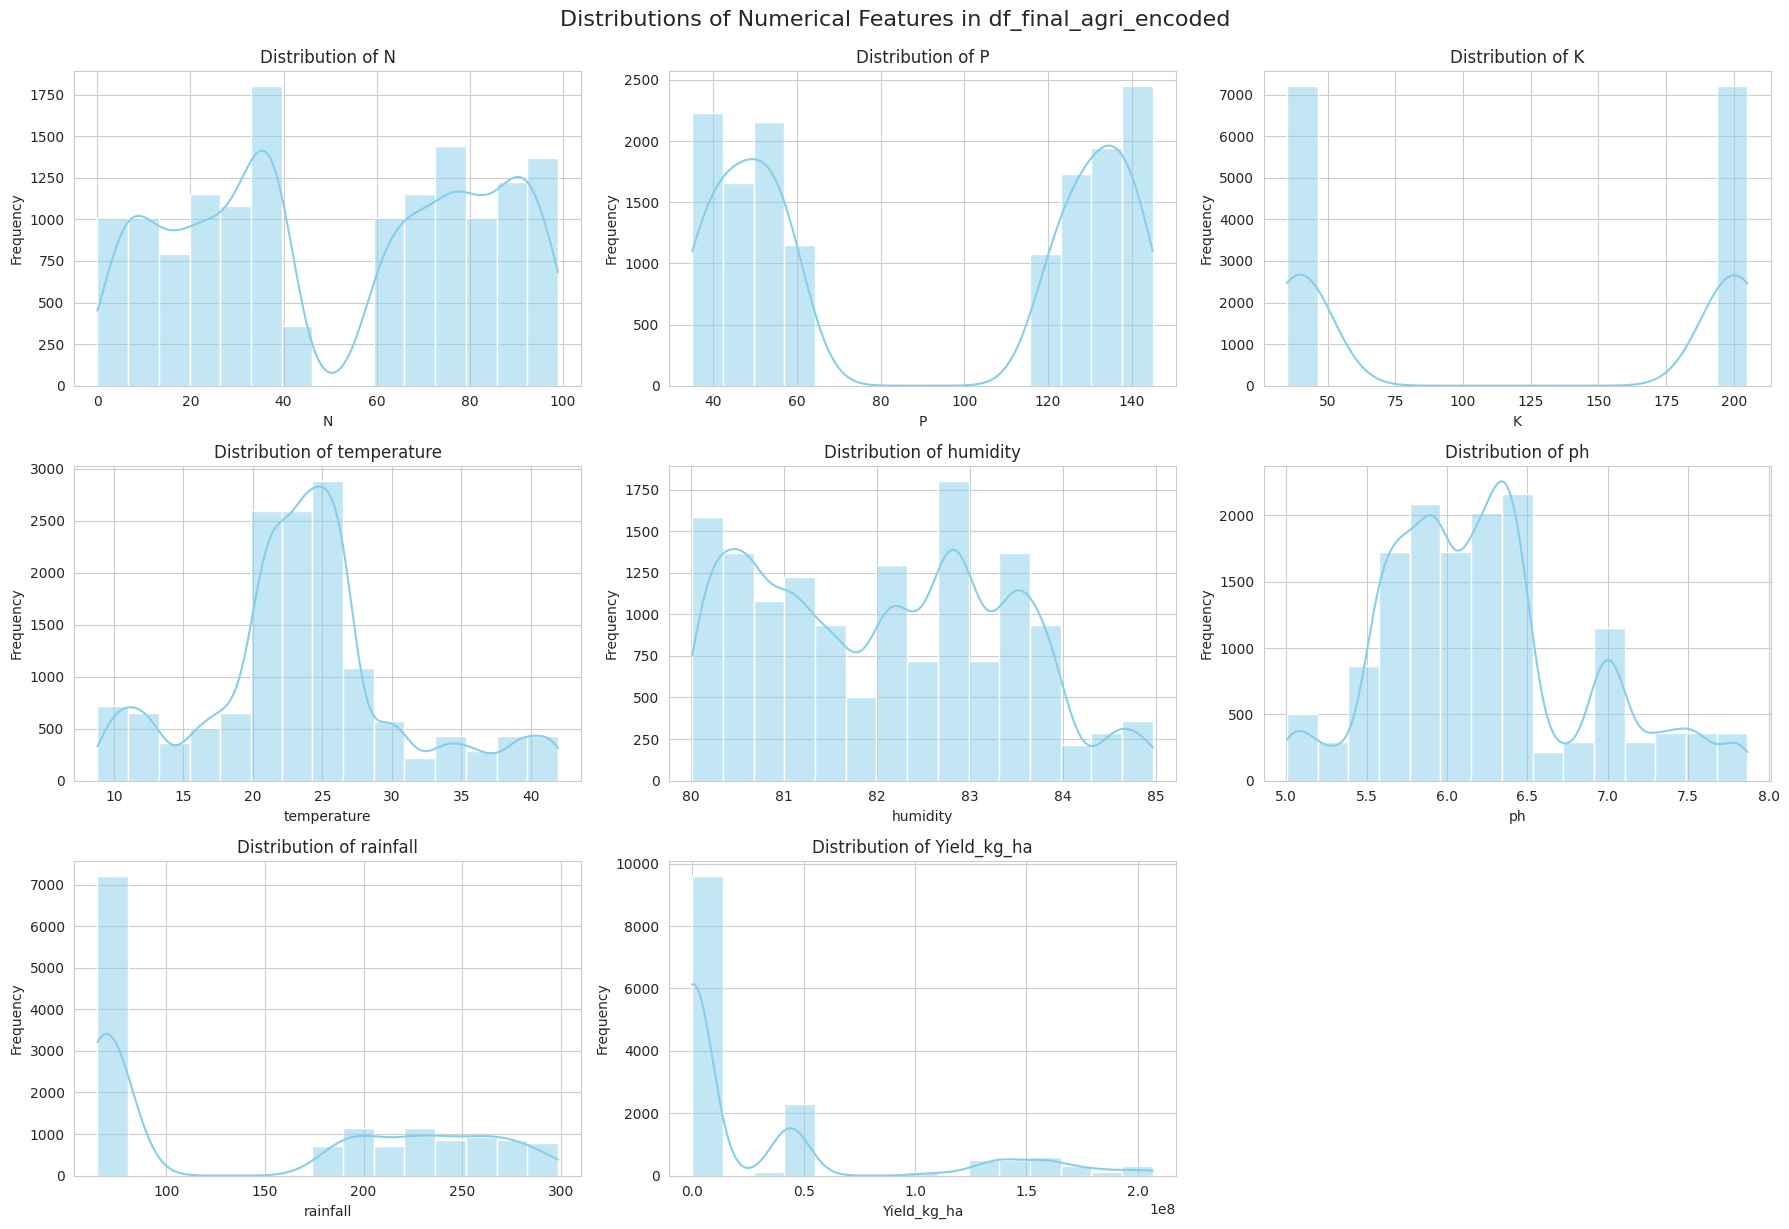


Correlation Matrix of Numerical Features (df_final_agri_encoded):


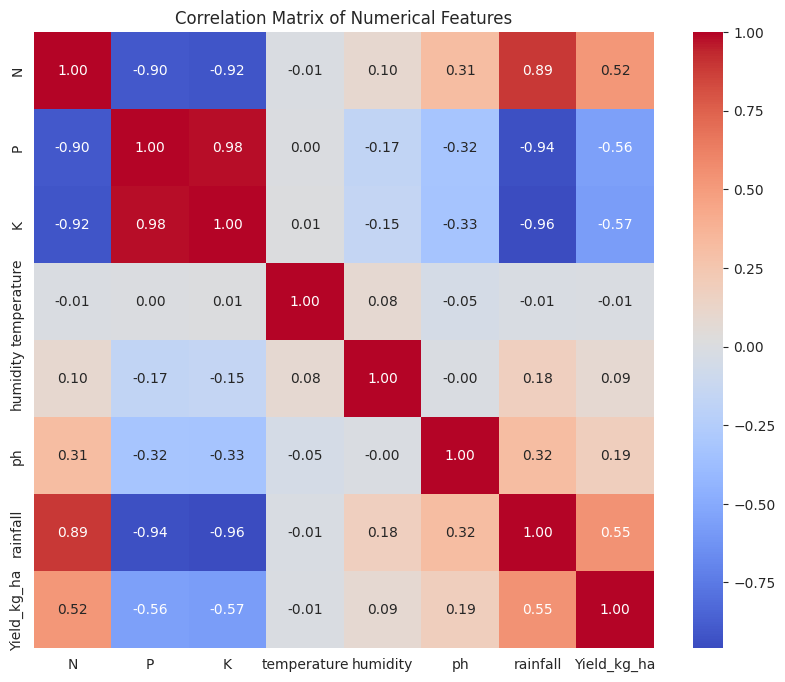


EDA Complete. Visualizations and Correlation Matrix generated.


In [209]:
print('--- Performing Exploratory Data Analysis (EDA) on df_final_agri_encoded ---')

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'df_final_agri' is defined from previous steps. If not, this will still error.
# Apply one-hot encoding to 'Country' and 'crop' columns in df_final_agri
df_final_agri_encoded = pd.get_dummies(df_final_agri, columns=['Country', 'crop'], drop_first=True)

# Set style for plots
sns.set_style("whitegrid")

# Define numerical features again for clarity, including the target variable
# Exclude Year for correlation analysis if it's treated as a categorical or just for grouping
numerical_features_for_eda = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'Yield_kg_ha']

# Plotting distributions of numerical features
plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_features_for_eda):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_final_agri_encoded[col], kde=True, bins=15, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.suptitle('Distributions of Numerical Features in df_final_agri_encoded', y=1.02, fontsize=16)
plt.show()

# Plotting relationships between numerical features and 'Yield_kg_ha'
plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_features_for_eda[:-1]): # Exclude 'Yield_kg_ha' from independent variables
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=df_final_agri_encoded[col], y=df_final_agri_encoded['Yield_kg_ha'], color='lightcoral', alpha=0.7)
    plt.title(f'{col} vs. Yield_kg_ha')
    plt.xlabel(col)
    plt.ylabel('Yield_kg_ha')
plt.tight_layout()
plt.suptitle('Relationships Between Numerical Features and Yield_kg_ha', y=1.02, fontsize=16)
plt.show()

print('\nCorrelation Matrix of Numerical Features (df_final_agri_encoded):')
# Calculate and display the correlation matrix for numerical features only
corr_matrix_final = df_final_agri_encoded[numerical_features_for_eda].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_final, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

print('\nEDA Complete. Visualizations and Correlation Matrix generated.')

In [ ]:
# Create a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("FAOSTAT - Overview", fontsize=16)

Text(0.5, 0.98, 'FAOSTAT - Overview')

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt

# 4) Correlation heatmap (numeric columns)
# Initialize a figure and a 2x2 grid of subplots (assuming this is part of a larger plot setup)
fig, axes = plt.subplots(2, 2, figsize=(12, 10)) # Added this line

numeric_df = fao.select_dtypes(include=['int64', 'float64'])
if numeric_df.shape[1] > 1:
    sns.heatmap(numeric_df.corr(), ax=axes[1, 1], annot=False)
    axes[1, 1].set_title("Correlation Heatmap (Numeric)")
else:
    axes[1, 1].text(0.5, 0.5, "Not enough numeric columns", ha='center')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for title
plt.show()

## Encoding categorical feature

In [ ]:
print("--- Encoding categorical features in df_final_agri ---")

# Apply one-hot encoding to 'Country' and 'crop' columns in df_final_agri
df_final_agri_encoded = pd.get_dummies(df_final_agri, columns=['Country', 'crop'], drop_first=True)

print("\nShape of df_final_agri after one-hot encoding:" , df_final_agri_encoded.shape)
print("\nFirst 5 rows of df_final_agri_encoded:")
display(df_final_agri_encoded.head())
print("\nData types of df_final_agri_encoded after encoding:")
print(df_final_agri_encoded.info())

--- Encoding categorical features in df_final_agri ---

Shape of df_final_agri after one-hot encoding: (14400, 10)

First 5 rows of df_final_agri_encoded:


Year  Yield_kg_ha   N    P    K  temperature   humidity        ph  \
0  2000      40000.0  24  130  195    29.996772  81.541566  6.112306   
1  2000      40000.0  13  144  204    30.728040  82.426141  6.092242   
2  2000      40000.0  22  123  205    32.445778  83.885049  5.896343   
3  2000      40000.0  36  125  196    37.465668  80.659687  6.155261   
4  2000      40000.0  24  131  196    22.032962  83.743728  5.732454   

    rainfall  crop_rice  
0  67.125345      False  
1  68.381355      False  
2  68.739325      False  
3  66.838723      False  
4  65.344408      False


Data types of df_final_agri_encoded after encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14400 entries, 0 to 14399
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         14400 non-null  int64  
 1   Yield_kg_ha  14400 non-null  float64
 2   N            14400 non-null  int64  
 3   P            14400 non-null  int64  
 4   K            14400 non-null  int64  
 5   temperature  14400 non-null  float64
 6   humidity     14400 non-null  float64
 7   ph           14400 non-null  float64
 8   rainfall     14400 non-null  float64
 9   crop_rice    14400 non-null  bool   
dtypes: bool(1), float64(5), int64(4)
memory usage: 1.0 MB
None


In [ ]:
print("--- Applying feature scaling (Standardization) to numerical features ---")

from sklearn.preprocessing import StandardScaler

# Identify numerical columns for scaling
# Exclude 'Year' and 'Yield_kg_ha' (our target variable), and the newly created dummy variables (which are boolean/int)
numerical_cols_to_scale = [
    'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'
]

# Initialize StandardScaler
scaler = StandardScaler()

# Apply standardization to the numerical columns
df_final_agri_encoded[numerical_cols_to_scale] = scaler.fit_transform(df_final_agri_encoded[numerical_cols_to_scale])

print("\nFirst 5 rows of df_final_agri_encoded after scaling:")
display(df_final_agri_encoded.head())
print("\nDescriptive statistics of scaled numerical features:")
print(df_final_agri_encoded[numerical_cols_to_scale].describe().to_markdown(numalign="left", stralign="left"))

--- Applying feature scaling (Standardization) to numerical features ---

First 5 rows of df_final_agri_encoded after scaling:


Year  Yield_kg_ha         N         P         K  temperature  humidity  \
0  2000      40000.0 -0.892767  0.925260  0.935523     0.889660 -0.405850   
1  2000      40000.0 -1.249420  1.249547  1.047771     0.994132  0.268390   
2  2000      40000.0 -0.957613  0.763116  1.060243     1.239535  1.380399   
3  2000      40000.0 -0.503691  0.809443  0.947995     1.956697 -1.078037   
4  2000      40000.0 -0.892767  0.948423  0.947995    -0.248082  1.272681   

         ph  rainfall  crop_rice  
0 -0.184826 -0.988902      False  
1 -0.217528 -0.974421      False  
2 -0.536819 -0.970294      False  
3 -0.114813 -0.992207      False  
4 -0.803940 -1.009436      False


Descriptive statistics of scaled numerical features:
|       | N           | P           | K          | temperature   | humidity    | ph        | rainfall   |
|:------|:------------|:------------|:-----------|:--------------|:------------|:----------|:-----------|
| count | 14400       | 14400       | 14400      | 14400         | 14400       | 14400     | 14400      |
| mean  | 6.31594e-17 | 0           | 0          | -8.88178e-18  | 3.94746e-17 | 0         | 0          |
| std   | 1.00003     | 1.00003     | 1.00003    | 1.00003       | 1.00003     | 1.00003   | 1.00003    |
| min   | -1.67092    | -1.27526    | -1.05999   | -2.13493      | -1.56837    | -1.9891   | -1.01328   |
| 25%   | -0.892767   | -0.997298   | -0.997634  | -0.473492     | -0.909386   | -0.702273 | -0.960559  |
| 50%   | -0.0497693  | -0.00127398 | 0.00012472 | -0.0158511    | 0.0440312   | -0.119581 | -0.278532  |
| 75%   | 0.906709    | 0.99475     | 1.01036    | 0.378453      | 0.764191    | 0.4096    | 0.924

# **Target Variable Distribution (Crop Yield)**

**Distribution Plot (Histogram + KDE)**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# --- Define df_final_agri from merged_df (assuming merged_df is available) ---
# Select relevant columns for df_final_agri and rename for consistency
df_final_agri = merged_df[[
    'Area', 'crop', 'Year', 'Value', 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'
]].copy()

df_final_agri.rename(columns={'Area': 'Country', 'Value': 'Yield_kg_ha'}, inplace=True)

# --- Create df_final_agri_encoded (from df_final_agri) ---
# Apply one-hot encoding to 'Country' and 'crop' columns in df_final_agri
df_final_agri_encoded = pd.get_dummies(df_final_agri, columns=['Country', 'crop'], drop_first=True)

# Identify numerical columns for scaling
numerical_cols_to_scale = [
    'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'
]

# Initialize StandardScaler
scaler = StandardScaler()

# Apply standardization to the numerical columns
df_final_agri_encoded[numerical_cols_to_scale] = scaler.fit_transform(df_final_agri_encoded[numerical_cols_to_scale])
# --- End of creating df_final_agri_encoded ---

plt.figure(figsize=(8,5))
sns.histplot(df_final_agri_encoded['Yield_kg_ha'], kde=True)
plt.title("Distribution of Crop Yield")
plt.xlabel("Yield (kg/ha)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()